DATA 602: INTRODUCTION TO MACHINE LEARNING 
SENTIMENT ANALYSIS FOR NEWS ARTICLES(USA PRESIDENTIAL ELECTION)
GROUP:SENTIMENT ANALYSIS-2

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;
from datetime import datetime as dt

In C:\Users\SUMANA\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SUMANA\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SUMANA\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SUMANA\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SUMANA\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [3]:
#load all the datasets that we will use
#df=pd.read_csv(r"C:\Users\aslam\Downloads\all_articles_final.csv")
#topics = pd.read_csv(r"C:\Users\aslam\Downloads\topics.csv")
#channels = pd.read_csv(r"C:\Users\aslam\Downloads\channels.csv")
#df.rename(columns={'Unnamed: 0':'article_id'},inplace=True)
#df.head()

df=pd.read_csv("all_articles_final.csv")
topics = pd.read_csv("topics.csv")
channels = pd.read_csv("channels.csv")
df.rename(columns={'Unnamed: 0':'article_id'},inplace=True)
df.head()

,article_id,Date,Media,Title,Article,Summary
0,0,1 month ago,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",President Donald Trump abruptly ended a taped ...,President Donald Trump abruptly ended a taped ...
1,1,2 weeks ago,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...
2,2,4 weeks ago,CBS News,Trump abruptly ends '60 Minutes' interview bef...,(CNN) President Donald Trump abruptly ended a ...,(CNN) President Donald Trump abruptly ended a ...
3,3,1 day ago,CBS News,"Barack Obama speaks out on politics, the presi...","""We all good? We got speed? Let's go!"" Almost ...",Almost four years after he left the White Hous...
4,4,"Jan 23, 2020",CBS News,CBS's New Star Trek Series Mirrors American Po...,Patrick Stewart makes his long-awaited return ...,Patrick Stewart makes his long-awaited return ...


In [4]:
df['biden']=False
df['trump']=False
df['republicans']=False
df['democrats']=False
df['relevant']=False
df.head()

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant
0,0,1 month ago,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",President Donald Trump abruptly ended a taped ...,President Donald Trump abruptly ended a taped ...,False,False,False,False,False
1,1,2 weeks ago,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...,False,False,False,False,False
2,2,4 weeks ago,CBS News,Trump abruptly ends '60 Minutes' interview bef...,(CNN) President Donald Trump abruptly ended a ...,(CNN) President Donald Trump abruptly ended a ...,False,False,False,False,False
3,3,1 day ago,CBS News,"Barack Obama speaks out on politics, the presi...","""We all good? We got speed? Let's go!"" Almost ...",Almost four years after he left the White Hous...,False,False,False,False,False
4,4,"Jan 23, 2020",CBS News,CBS's New Star Trek Series Mirrors American Po...,Patrick Stewart makes his long-awaited return ...,Patrick Stewart makes his long-awaited return ...,False,False,False,False,False


In [5]:
for i,k in enumerate(df['Title']):
    if ("biden" or "joe") in k.lower():
        df['biden'][i]=True
        df['relevant'][i]=True
    if ("trump" or "donald" or 'president') in k.lower():
        df['trump'][i]=True
        df['relevant'][i]=True

    if ('dems' or "democrats" or "left" or"democratic") in k.lower():
        df['democrats'][i]=True
        df['relevant'][i]=True

    if ("republicans" or "reps" or "right") in k.lower():
        df['republicans'][i]=True
        df['relevant'][i]=True


C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:

In [6]:
df.head()

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant
0,0,1 month ago,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",President Donald Trump abruptly ended a taped ...,President Donald Trump abruptly ended a taped ...,False,True,False,False,True
1,1,2 weeks ago,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...,False,True,False,False,True
2,2,4 weeks ago,CBS News,Trump abruptly ends '60 Minutes' interview bef...,(CNN) President Donald Trump abruptly ended a ...,(CNN) President Donald Trump abruptly ended a ...,False,True,False,False,True
3,3,1 day ago,CBS News,"Barack Obama speaks out on politics, the presi...","""We all good? We got speed? Let's go!"" Almost ...",Almost four years after he left the White Hous...,False,True,False,False,True
4,4,"Jan 23, 2020",CBS News,CBS's New Star Trek Series Mirrors American Po...,Patrick Stewart makes his long-awaited return ...,Patrick Stewart makes his long-awaited return ...,False,False,False,False,False


In [7]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from collections import Mapping
bloblist_desc = []

df_tweet_descr_str=df['Summary'].astype(str)
for row in df_tweet_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
df['Polarity']=df_tweet_polarity_desc['sentiment'] 

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  after removing the cwd from sys.path.


In [8]:
import datetime
for i,k in enumerate(df['Date']): 
    k=k.replace(',','')
    k=k.replace('1 month ago',"Oct 18 2020")
    k=k.replace('4 weeks ago', "Oct 17 2020")
    k=k.replace('3 weeks ago', "Oct 24 2020")
    k=k.replace('2 weeks ago', "Nov 01 2020")
    k=k.replace('1 day ago', "Nov 17 2020")
    k=k.replace('1 week ago', "Nov 11 2020")
    k=k.replace('7 hours ago', "Nov 18 2020")
    k=k.replace('8 hours ago', "Nov 18 2020")
    k=k.replace('16 hours ago', "Nov 18 2020")
    k=k.replace('4 days ago', "Nov 14 2020")
    k=k.replace('6 days ago', "Nov 12 2020")
    k=k.replace('11 hours ago', "Nov 18 2020")
    k=k.replace('3 days ago', "Nov 15 2020")
    k=k.replace('1 day ago', "Nov 17 2020")
    k=k.replace('10 days ago', "Nov 08 2020")
    k=k.replace('2 days ago', "Nov 16 2020")
    k=k.replace('5 days ago', "Nov 13 2020")
    k=k.replace('7 days ago', "Nov 11 2020")
    k=k.replace('12 hours ago', "Nov 11 2020")
    k=k.replace('10 hours ago', "Nov 11 2020")
    k=k.replace('23-Jan-20', "Jan 23 2020")
    try:
        if datetime.datetime.strptime(k, '%b %d %Y'):
            df['Date'][i]=datetime.datetime.strptime(k, '%b %d %Y').strftime('%d-%m-%Y')
        elif datetime.datetime.strptime(k, '%d-%b-%Y'):
            df['Date'][i]=datetime.datetime.strptime(k, '%d-%b-%Y').strftime('%d-%m-%Y')
    except:
        df['Date'][i]=datetime.datetime.strptime(k, '%d-%b-%y').strftime('%d-%m-%Y')


C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df['about']=''

In [10]:
df['article published'] = df['Date'].dt.strftime('%Y-%m')

In [11]:
for i,k in enumerate(df['trump']):
    if k==True:
        df['about'][i]='trump'
    

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
for i,k in enumerate(df['biden']):
    if k==True:
        df['about'][i]='biden'
    

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df.groupby('article published').size().reset_index().rename(columns={0: 'number of articles'})

,article published,number of articles
0,2020-01,142
1,2020-02,85
2,2020-03,77
3,2020-04,90
4,2020-05,81
5,2020-06,76
6,2020-07,96
7,2020-08,162
8,2020-09,112
9,2020-10,281


In [14]:
jan = df.loc[(df['article published'] == '2020-01')]
feb = df.loc[(df['article published'] == '2020-02')]
mar = df.loc[(df['article published'] == '2020-03')]
apr = df.loc[(df['article published'] == '2020-04')]
may = df.loc[(df['article published'] == '2020-05')]
jun = df.loc[(df['article published'] == '2020-06')]
jul = df.loc[(df['article published'] == '2020-07')]
aug = df.loc[(df['article published'] == '2020-08')]
sep = df.loc[(df['article published'] == '2020-09')]
oct = df.loc[(df['article published'] == '2020-10')]
nov = df.loc[(df['article published'] == '2020-11')]

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
jan.head()

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant,Polarity,about,article published
1,1,2020-01-11,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...,False,True,False,False,True,0.115000,trump,2020-01
4,4,2020-01-23,CBS News,CBS's New Star Trek Series Mirrors American Po...,Patrick Stewart makes his long-awaited return ...,Patrick Stewart makes his long-awaited return ...,False,False,False,False,False,-0.010714,,2020-01
13,13,2020-01-04,CBS News,Americans’ main sources for political news var...,Americans turn to a wide range of media outlet...,The sources named by the remaining 51% of U.S....,False,False,False,False,False,0.070098,,2020-01
27,27,2020-01-16,CBS News,Planned Parenthood launches $45 million invest...,As abortion-supporters brace for another year ...,As abortion-supporters brace for another year ...,False,False,False,False,False,0.187500,,2020-01
30,30,2020-01-22,CBS News,Reince Priebus joins CBS News as political ana...,CBS News announced Wednesday that it has hired...,CBS News announced Wednesday that it has hired...,False,False,False,False,False,0.136597,,2020-01


In [16]:
 df_trump=df[df['about'].str.contains("trump")]

In [17]:
df_trump

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant,Polarity,about,article published
0,0,2020-10-18,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",President Donald Trump abruptly ended a taped ...,President Donald Trump abruptly ended a taped ...,False,True,False,False,True,0.197222,trump,2020-10
1,1,2020-01-11,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...,False,True,False,False,True,0.115000,trump,2020-01
2,2,2020-10-17,CBS News,Trump abruptly ends '60 Minutes' interview bef...,(CNN) President Donald Trump abruptly ended a ...,(CNN) President Donald Trump abruptly ended a ...,False,True,False,False,True,-0.091319,trump,2020-10
3,3,2020-11-17,CBS News,"Barack Obama speaks out on politics, the presi...","""We all good? We got speed? Let's go!"" Almost ...",Almost four years after he left the White Hous...,False,True,False,False,True,-0.022222,trump,2020-11
8,8,2020-11-05,CBS News,Trump administration cuts funding for coronavi...,Peter Daszak is a scientist whose work is help...,Scott Pelley: --if it hadn't been for the work...,False,True,False,False,True,0.137500,trump,2020-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,139,2020-09-09,CBS News,Democrats Increasingly Concerned Trump Could W...,"WAYZATA, Minn. (AP) — For such a volatile year...",It’s unclear how well his rhetoric will resona...,False,True,False,False,True,0.350000,trump,2020-09
1283,143,2020-08-08,CBS News,‘He Just Unilaterally Cut Social Security’ Mas...,BOSTON (CBS/CNN) President Donald Trump tried ...,“I’m taking action to provide an additional or...,False,True,False,False,True,-0.119048,trump,2020-08
1287,147,2020-04-22,CBS News,DeKalb Democrat who backed President Trump say...,You have permission to edit this article.\n\nE...,You have permission to edit this article.,False,True,False,False,True,0.000000,trump,2020-04
1315,175,2020-01-11,CBS News,President Trump Falsely Claims Democrats Are T...,MINNEAPOLIS (WCCO) — Two days after Election D...,In his first public appearance since Election ...,False,True,False,False,True,-0.124074,trump,2020-01


In [20]:
df_biden=df[df['about'].str.contains("biden")]

In [21]:
df_biden

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant,Polarity,about,article published
24,24,2020-07-13,CBS News,2020 Daily Trail Markers: CBS poll - Biden lea...,"Amid the coronavirus outbreak, the CBS News Ba...","In Texas, Mr. Trump has 46% to Biden's 45%, wi...",True,False,False,False,True,0.087500,biden,2020-07
39,39,2020-10-18,CBS News,"Biden remains focused on COVID, economy amid S...",New polls today show Democratic nominee Joe Bi...,Get Breaking News Delivered to Your InboxSome ...,True,False,False,False,True,0.090909,biden,2020-10
83,83,2020-12-09,CBS News,CBS reporter tweets about Biden not 'outworkin...,CBS reporter Kathryn Watson questioned why Joe...,CBS reporter Kathryn Watson questioned why Joe...,True,True,False,False,True,0.117045,biden,2020-12
109,109,2020-09-21,CBS News,"Northeast Pennsylvania, A ‘Cutthroat Area In P...","SWOYERSVILLE, Pa. (CBS) — The road to the Whit...",Northeastern Pennsylvania Sizing Up To Be Impo...,True,True,False,False,True,0.225000,biden,2020-09
114,114,2020-08-19,CBS News,Democrats formally nominate Joe Biden and more...,"New COVID-19 restrictions in place as 73,000 h...","New COVID-19 restrictions in place as 73,000 h...",True,False,False,False,True,0.136364,biden,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,152,2020-10-24,CBS News,"President Trump, Joe Biden In Florida Thursday...",MIAMI (CBSMiami) – With just five days left un...,MIAMI (CBSMiami) – With just five days left un...,True,True,False,False,True,0.118750,biden,2020-10
1299,159,2020-10-18,CBS News,First Trump-Biden Presidential Debate Devolves...,CBS WASHINGTON — The showdown between Presiden...,CBS WASHINGTON — The showdown between Presiden...,True,True,False,False,True,0.049036,biden,2020-10
1314,174,2020-03-09,CBS News,Joe Biden Speaks To Jacob Blake On The Phone D...,CHICAGO (CBS) — Democratic presidential nomine...,The former vice president said he also spoke o...,True,False,False,False,True,0.197917,biden,2020-03
1319,179,2020-10-24,CBS News,"Trump, Biden To Hold Dueling Campaign Events F...",MINNEAPOLIS (WCCO) — President Donald Trump an...,MINNEAPOLIS (WCCO) — President Donald Trump an...,True,True,False,False,True,-0.001339,biden,2020-10


TRUMP PROPHET MODEL

In [126]:
new_dataset_trump = df_trump[['Date','Polarity']]

new_dataset_trump.dtypes


color_pal = ["#F8766D", "#D39200", "#93AA00",
"#00BA38", "#00C19F", "#00B9E3",
"#619CFF", "#DB72FB"]
#new_dataset_trump.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East Trump')
#plt.show()

def create_features(df_trump, label=None):
    df_trump = df_trump.copy()
    df_trump['date'] = df_trump.index
    df_trump['hour'] = df_trump['Date'].dt.hour
    df_trump['dayofweek'] = df_trump['Date'].dt.dayofweek
    df_trump['quarter'] = df_trump['Date'].dt.quarter
    df_trump['month'] = df_trump['Date'].dt.month
    df_trump['year'] = df_trump['Date'].dt.year
    df_trump['dayofyear'] = df_trump['Date'].dt.dayofyear
    df_trump['dayofmonth'] = df_trump['Date'].dt.day
    df_trump['weekofyear'] = df_trump['Date'].dt.weekofyear
    X = df_trump[['hour','dayofweek','quarter','month','year',
    'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df_trump[label]
        return X, y
    return X

X, y = create_features(new_dataset_trump, label='Polarity')
features_and_target = pd.concat([X, y], axis=1)
# See our features and target

features_and_target.head()

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Polarity
0,0,6,4,10,2020,292,18,42,0.197222
1,0,5,1,1,2020,11,11,2,0.115000
2,0,5,4,10,2020,291,17,42,-0.091319
3,0,1,4,11,2020,322,17,47,-0.022222
8,0,3,4,11,2020,310,5,45,0.137500


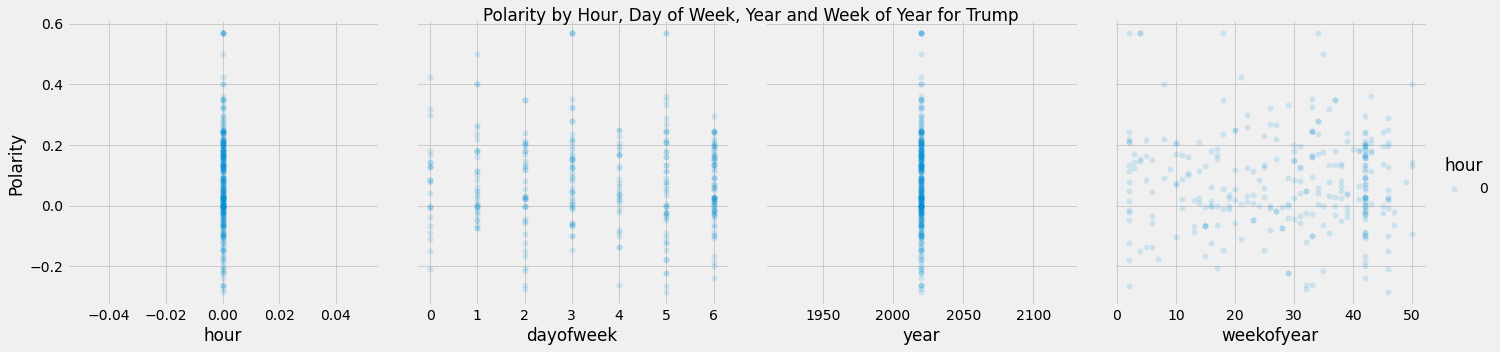

In [127]:
sns.pairplot(features_and_target.dropna(),
hue='hour',
x_vars=['hour','dayofweek',
'year','weekofyear'],
y_vars='Polarity',
height=5,
plot_kws={'alpha':0.15, 'linewidth':0}
)
plt.suptitle('Polarity by Hour, Day of Week, Year and Week of Year for Trump')
plt.show()

In [128]:
new_dataset_trump=new_dataset_trump.set_index('Date')

In [129]:
split_date = '01-Aug-2020'
trump_train = new_dataset_trump.loc[new_dataset_trump.index <= split_date].copy()
trump_test = new_dataset_trump.loc[new_dataset_trump.index > split_date].copy()

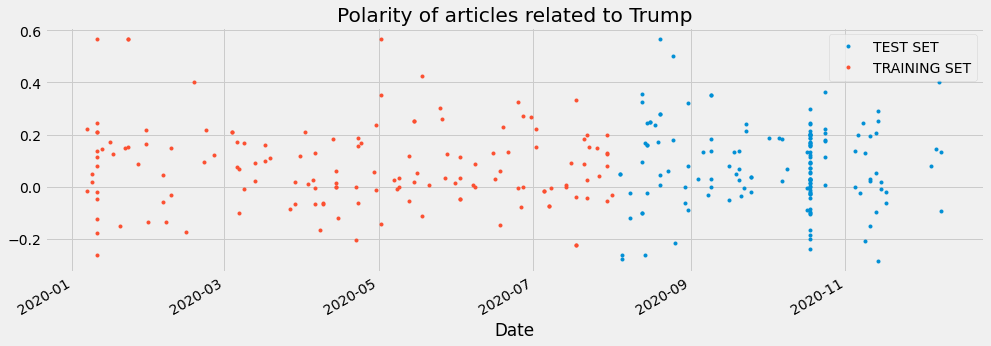

In [130]:
# Plot train and test so you can see where we have split
trump_test \
.rename(columns={'Polarity': 'TEST SET'}) \
.join(trump_train.rename(columns={'Polarity': 'TRAINING SET'}),
how='outer') \
.plot(figsize=(15,5), title='Polarity of articles related to Trump', style='.')
plt.show()

In [131]:
# Format data for prophet model using ds and y
trump_train.reset_index() \
.rename(columns={'Date':'ds',
'Polarity':'y'}).head()

,ds,y
0,2020-01-11,1.150000e-01
1,2020-05-18,4.250000e-01
2,2020-04-13,1.813853e-01
3,2020-07-14,4.625929e-18
4,2020-04-14,1.428571e-02


In [132]:
# Setup and train model and fit
model = Prophet()
model.fit(trump_train.reset_index() \
.rename(columns={'Date':'ds','Polarity':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
# Predict on training set with model
trump_test_fcst = model.predict(df=trump_test.reset_index() \
.rename(columns={'Date':'ds'}))

In [134]:
trump_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-08-04,0.058187,-0.121087,0.254948,0.058187,0.058187,0.010706,0.010706,0.010706,0.010706,0.010706,0.010706,0.0,0.0,0.0,0.068893
1,2020-08-04,0.058187,-0.127456,0.262477,0.058187,0.058187,0.010706,0.010706,0.010706,0.010706,0.010706,0.010706,0.0,0.0,0.0,0.068893
2,2020-08-05,0.058120,-0.171250,0.218579,0.058120,0.058120,-0.035253,-0.035253,-0.035253,-0.035253,-0.035253,-0.035253,0.0,0.0,0.0,0.022867
3,2020-08-05,0.058120,-0.172808,0.226839,0.058120,0.058120,-0.035253,-0.035253,-0.035253,-0.035253,-0.035253,-0.035253,0.0,0.0,0.0,0.022867
4,2020-08-08,0.057919,-0.134827,0.232852,0.057919,0.057919,-0.008961,-0.008961,-0.008961,-0.008961,-0.008961,-0.008961,0.0,0.0,0.0,0.048958


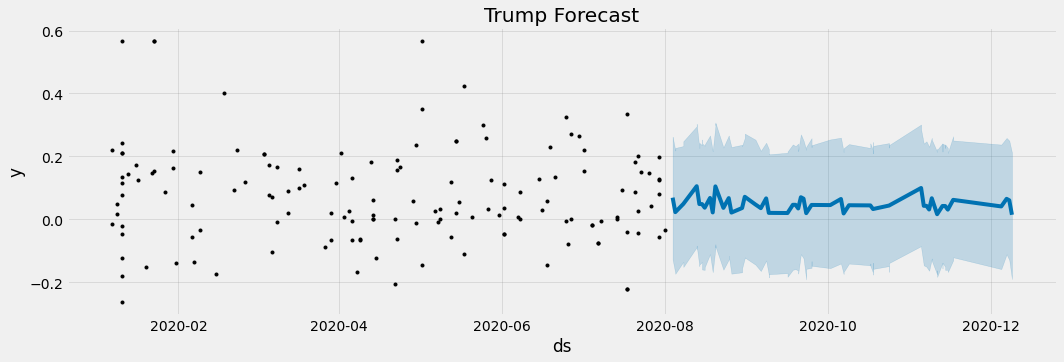

In [135]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(trump_test_fcst,
ax=ax)
plt.title("Trump Forecast")
plt.show()


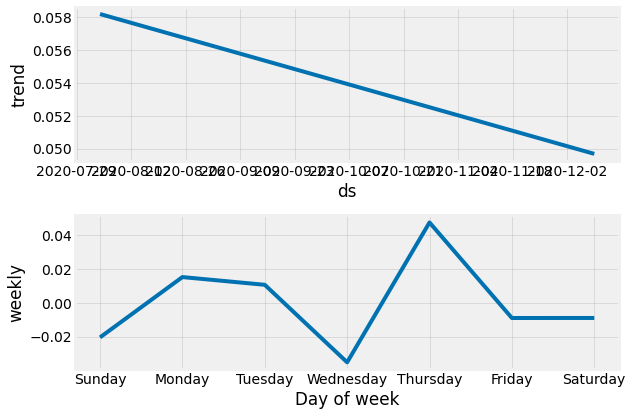

In [136]:
# Plot the components of the model
f.set_figheight(15)
f.set_figwidth(35)
fig = model.plot_components(trump_test_fcst)

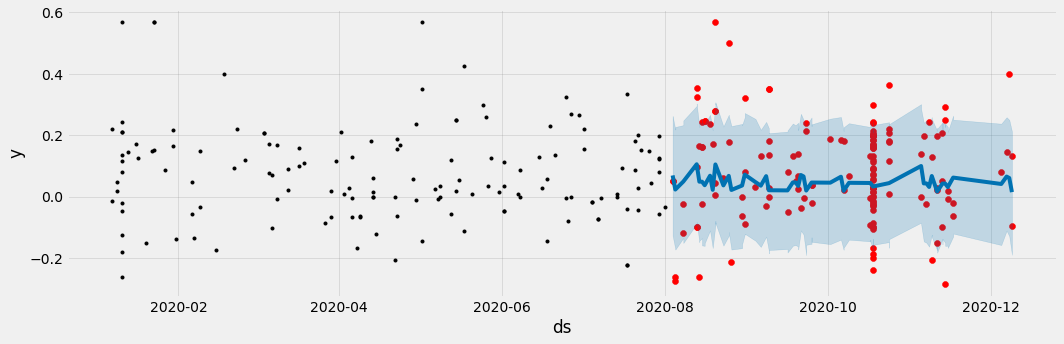

In [137]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(trump_test.index, trump_test['Polarity'], color='r')
fig = model.plot(trump_test_fcst, ax=ax)

In [138]:
print('Mean Squared Error:\n {}'.format(mean_squared_error(y_true=trump_test['Polarity'],
y_pred=trump_test_fcst['yhat'])))
print("Mean Absolute Error:\n", mean_absolute_error(y_true=trump_test['Polarity'],
y_pred=trump_test_fcst['yhat']))

Mean Squared Error:
 0.0249657968924951
Mean Absolute Error:
 0.1260353232104111


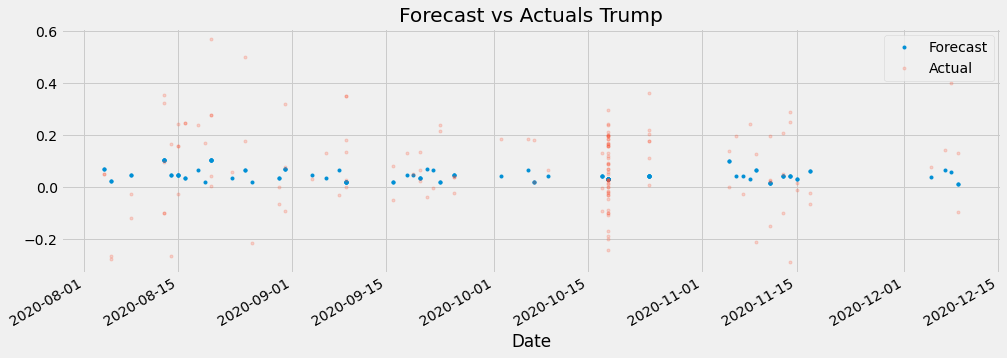

In [139]:
ax = pjme_test_fcst.set_index('ds')['yhat'].plot(figsize=(15, 5),
lw=0,
style='.')

trump_test['Polarity'].plot(ax=ax,
style='.',
lw=0,
alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals Trump')
plt.show()

# PROPHET MODEL FOR BIDEN RELATED ARTICLES 

In [146]:
df_biden=df[df['about'].str.contains("biden")]

In [147]:
df_biden.head()

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant,Polarity,about,article published
24,24,2020-07-13,CBS News,2020 Daily Trail Markers: CBS poll - Biden lea...,"Amid the coronavirus outbreak, the CBS News Ba...","In Texas, Mr. Trump has 46% to Biden's 45%, wi...",True,False,False,False,True,0.087500,biden,2020-07
39,39,2020-10-18,CBS News,"Biden remains focused on COVID, economy amid S...",New polls today show Democratic nominee Joe Bi...,Get Breaking News Delivered to Your InboxSome ...,True,False,False,False,True,0.090909,biden,2020-10
83,83,2020-12-09,CBS News,CBS reporter tweets about Biden not 'outworkin...,CBS reporter Kathryn Watson questioned why Joe...,CBS reporter Kathryn Watson questioned why Joe...,True,True,False,False,True,0.117045,biden,2020-12
109,109,2020-09-21,CBS News,"Northeast Pennsylvania, A ‘Cutthroat Area In P...","SWOYERSVILLE, Pa. (CBS) — The road to the Whit...",Northeastern Pennsylvania Sizing Up To Be Impo...,True,True,False,False,True,0.225000,biden,2020-09
114,114,2020-08-19,CBS News,Democrats formally nominate Joe Biden and more...,"New COVID-19 restrictions in place as 73,000 h...","New COVID-19 restrictions in place as 73,000 h...",True,False,False,False,True,0.136364,biden,2020-08


In [148]:
new_dataset_biden = df_biden[['Date','Polarity']]

new_dataset_biden.dtypes


color_pal = ["#F8766D", "#D39200", "#93AA00",
"#00BA38", "#00C19F", "#00B9E3",
"#619CFF", "#DB72FB"]
#new_dataset_biden.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East ')
#plt.show()

def create_features(df_biden, label=None):
    df_biden= df_trump.copy()
    df_biden['date'] = df_biden.index
    df_biden['hour'] = df_biden['Date'].dt.hour
    df_biden['dayofweek'] = df_biden['Date'].dt.dayofweek
    df_biden['quarter'] = df_biden['Date'].dt.quarter
    df_biden['month'] = df_biden['Date'].dt.month
    df_biden['year'] = df_biden['Date'].dt.year
    df_biden['dayofyear'] = df_biden['Date'].dt.dayofyear
    df_biden['dayofmonth'] = df_biden['Date'].dt.day
    df_biden['weekofyear'] = df_biden['Date'].dt.weekofyear
    X_biden = df_biden[['hour','dayofweek','quarter','month','year',
    'dayofyear','dayofmonth','weekofyear']]
    if label:
        y_biden = df_biden[label]
        return X_biden, y_biden
    return X_biden

X_biden, y_biden = create_features(new_dataset_biden, label='Polarity')
features_and_target_biden = pd.concat([X_biden, y_biden], axis=1)
# See our features and target

features_and_target_biden.head()

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Polarity
0,0,6,4,10,2020,292,18,42,0.197222
1,0,5,1,1,2020,11,11,2,0.115000
2,0,5,4,10,2020,291,17,42,-0.091319
3,0,1,4,11,2020,322,17,47,-0.022222
8,0,3,4,11,2020,310,5,45,0.137500


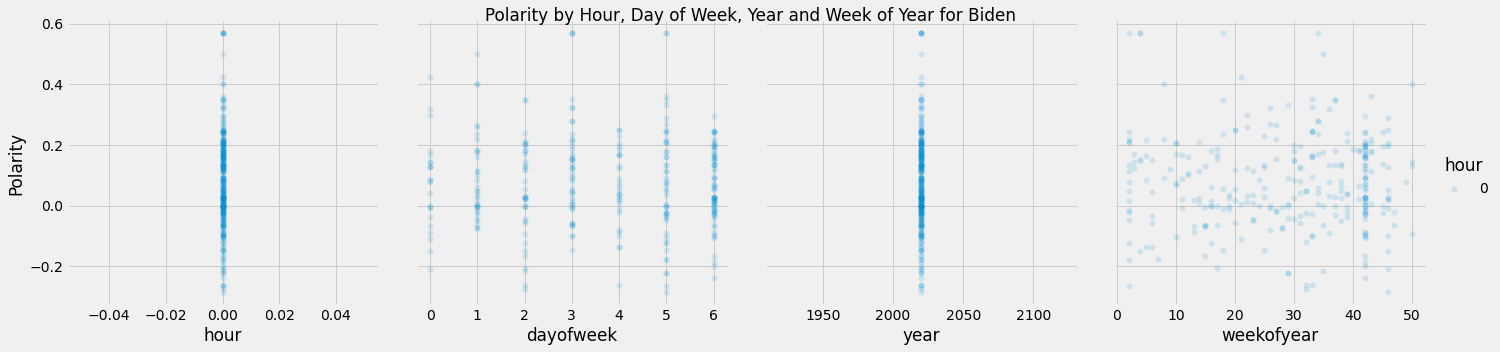

In [149]:
sns.pairplot(features_and_target_biden.dropna(),
hue='hour',
x_vars=['hour','dayofweek',
'year','weekofyear'],
y_vars='Polarity',
height=5,
plot_kws={'alpha':0.15, 'linewidth':0}
)
plt.suptitle('Polarity by Hour, Day of Week, Year and Week of Year for Biden')
plt.show()

In [150]:
new_dataset_biden=new_dataset_biden.set_index('Date')

In [151]:
new_dataset_biden.head()

,Polarity
Date,
2020-07-13,0.087500
2020-10-18,0.090909
2020-12-09,0.117045
2020-09-21,0.225000
2020-08-19,0.136364


In [152]:
split_date = '01-Aug-2020'
biden_train = new_dataset_biden.loc[new_dataset_biden.index <= split_date].copy()
biden_test = new_dataset_biden.loc[new_dataset_biden.index > split_date].copy()

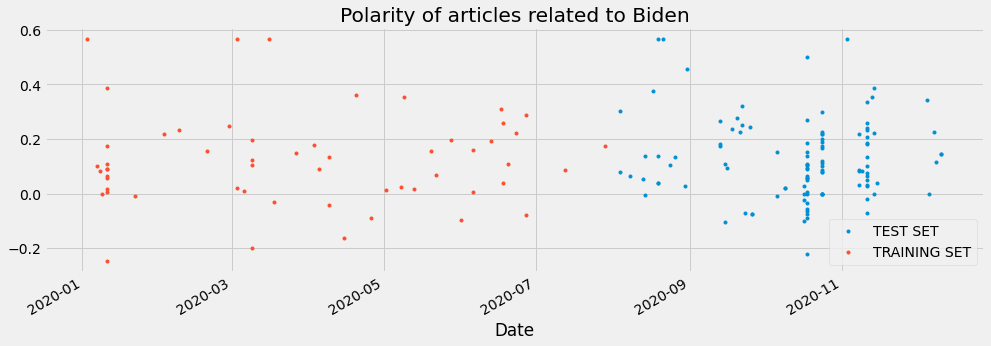

In [153]:
# Plot train and test so you can see where we have split
biden_test \
.rename(columns={'Polarity': 'TEST SET'}) \
.join(biden_train.rename(columns={'Polarity': 'TRAINING SET'}),
how='outer') \
.plot(figsize=(15,5), title='Polarity of articles related to Biden', style='.')
plt.show()

In [154]:
# Format data for prophet model using ds and y
biden_train.reset_index() \
.rename(columns={'Date':'ds',
'Polarity':'y'}).head()

,ds,y
0,2020-07-13,0.087500
1,2020-01-22,-0.008889
2,2020-04-09,0.132692
3,2020-06-20,0.107500
4,2020-02-29,0.246667


In [155]:
# Setup and train model and fit
model_biden = Prophet()
model_biden.fit(biden_train.reset_index() \
.rename(columns={'Date':'ds','Polarity':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [156]:
# Predict on training set with model
biden_test_fcst = model.predict(df=biden_test.reset_index() \
.rename(columns={'Date':'ds'}))

In [157]:
biden_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-08-04,0.058187,-0.124658,0.273728,0.058187,0.058187,0.010706,0.010706,0.010706,0.010706,0.010706,0.010706,0.0,0.0,0.0,0.068893
1,2020-08-04,0.058187,-0.120515,0.255882,0.058187,0.058187,0.010706,0.010706,0.010706,0.010706,0.010706,0.010706,0.0,0.0,0.0,0.068893
2,2020-08-08,0.057919,-0.141418,0.239863,0.057919,0.057919,-0.008961,-0.008961,-0.008961,-0.008961,-0.008961,-0.008961,0.0,0.0,0.0,0.048958
3,2020-08-13,0.057585,-0.107747,0.293661,0.057585,0.057585,0.047673,0.047673,0.047673,0.047673,0.047673,0.047673,0.0,0.0,0.0,0.105258
4,2020-08-14,0.057518,-0.152657,0.240900,0.057518,0.057518,-0.008973,-0.008973,-0.008973,-0.008973,-0.008973,-0.008973,0.0,0.0,0.0,0.048545


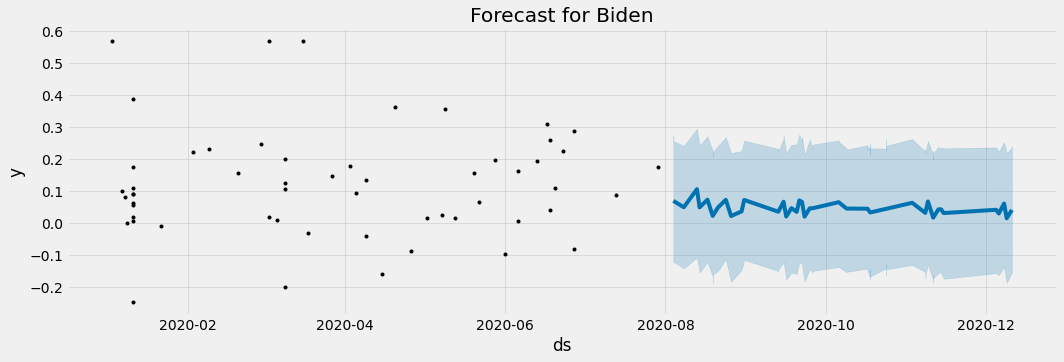

In [158]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_biden.plot(biden_test_fcst,
ax=ax)
plt.title("Forecast for Biden")
plt.show()

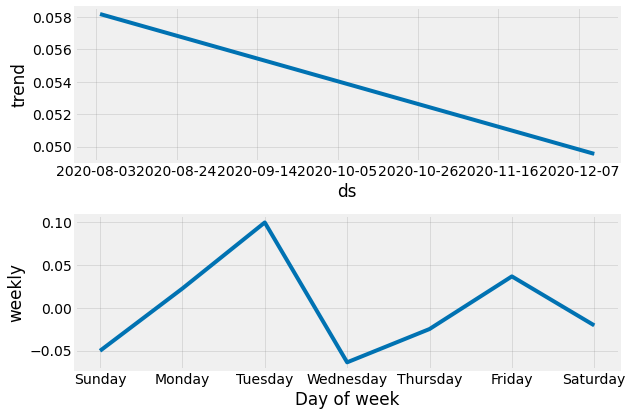

In [159]:
# Plot the components of the model

f.set_figheight(15)
f.set_figwidth(35)
fig = model_biden.plot_components(biden_test_fcst)


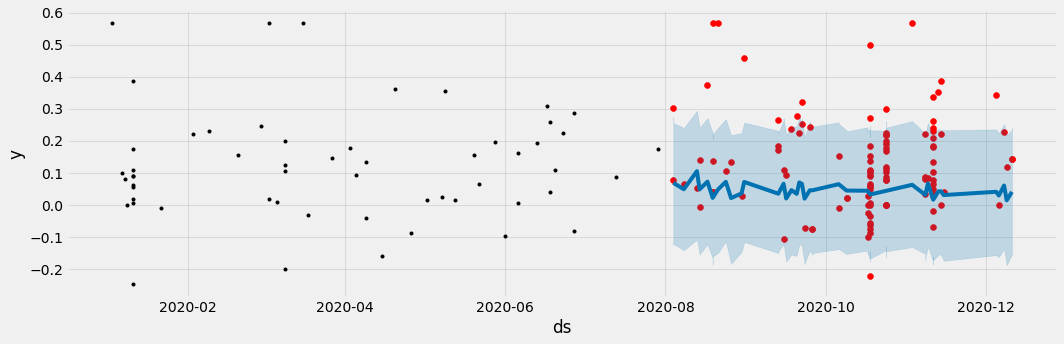

In [160]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(biden_test.index, biden_test['Polarity'], color='r')

fig = model_biden.plot(biden_test_fcst, ax=ax)

In [162]:
print('Mean Squared Error:\n {}'.format(mean_squared_error(y_true=biden_test['Polarity'],
y_pred=biden_test_fcst['yhat'])))
print("Mean Absolute Error:\n", mean_absolute_error(y_true=biden_test['Polarity'],
y_pred=biden_test_fcst['yhat']))

Mean Squared Error:
 0.029715421358007643
Mean Absolute Error:
 0.12622322916375617


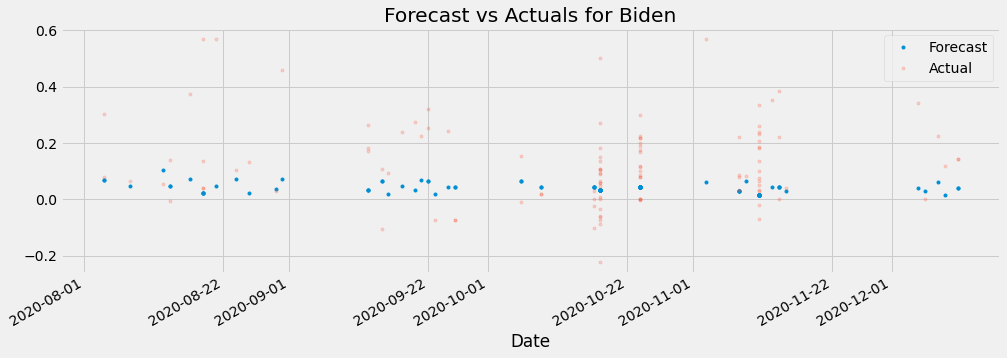

In [163]:
ax = biden_test_fcst.set_index('ds')['yhat'].plot(figsize=(15, 5),
lw=0,
style='.')

biden_test['Polarity'].plot(ax=ax,
style='.',
lw=0,
alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals for Biden')
plt.show()

# JAN

In [63]:
from gensim.parsing.preprocessing import strip_numeric
data_text = jan[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ')  if strip_numeric(word.lower()) not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

c = 0 / 142

In [64]:
#save data because it takes very long to remove stop words
pickle.dump(data_text, open('jan.dat', 'wb'))

In [65]:
#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

In [66]:
#number of topics we will cluster for: 10
num_topics =5;

LDA
We will use the gensim library for LDA. First, we obtain a id-2-word dictionary. For each headline, we will use the dictionary to obtain a mapping of the word id to their word counts. The LDA model uses both of these mappings.

In [67]:
id2word = gensim.corpora.Dictionary(train_headlines)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(4260 unique tokens: ['45', 'BIASED.”The', 'CBS', 'Day,', 'Election']...) from 142 documents (total 9513 corpus positions)


In [68]:
corpus = [id2word.doc2bow(text) for text in train_headlines]

In [69]:
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 142 documents, updating model once every 142 documents, evaluating perplexity every 142 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.447 per-word bound, 1395.6 perplexity estimate based on a held-out corpus of 142 documents with 9513 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #142/142
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.008*"Trump" + 0.005*"said" + 0.005*"CBS" + 0.004*"vote" + 0.004*"Biden" + 0.004*"voters" + 0.004*"House" + 0.004*"News" + 0.003*"President" + 0.003*"first"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.009*"Biden" + 0.007*"Trump" + 0.004*"election" + 0.004*"Joe" + 0.003*"Democratic" + 0.003*"S

generating LDA topics
We will iterate over the number of topics, get the top words in each cluster and add them to a dataframe

In [70]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [71]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,Biden,Democratic,Trump,Trump
1,said,Trump,CNN,Democratic,election
2,CBS,election,Trump,said,said
3,vote,Joe,said,President,Democratic
4,Biden,Democratic,voters,Republican,President
5,voters,Senate,political,Biden,Biden
6,House,President,main,Democrats,News
7,News,Mayor,President,campaign,Republican
8,President,would,impeachment,CNN,political
9,first,said,--,—,percent


or NMF, we need to obtain a design matrix. To improve results, I am going to apply TfIdf transformation to the counts.

In [72]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [73]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [74]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,started,main,biden,fox,cnn
1,iphone,sources,percent,trust,debate
2,magsafe,political,trump,trial,town
3,feature,adults,president,republicans,network
4,best,named,voters,hannity,democratic
5,getting,news,election,news,halls
6,12,source,vote,lineup,sanders
7,new,americans,votes,impeachment,warren
8,bronx,election,said,ran,february
9,torres,for,state,primetime,hampshire


Text(0.5, 0, 'Candidate Name')

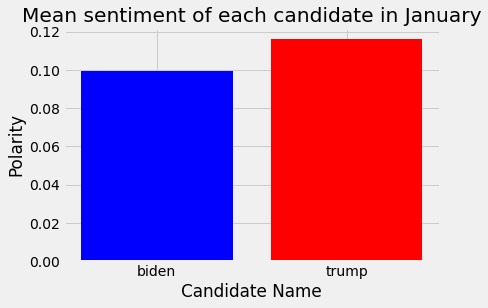

In [75]:
jan1=jan.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
jan1.drop([0],inplace=True)
plt.bar(jan1['about'], jan1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in January")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# FEB

In [43]:
data_text = feb[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('feb.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 85

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3016 unique tokens: ['2015,', 'AME', 'Black', 'Carolina,', 'Caucus']...) from 85 documents (total 5701 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 85 documents, updating model once every 85 documents, evaluating perplexity every 85 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.376 per-word bound, 1328.8 perplexity estimate based on a held-out corpus of 85 documents with 5701 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #85/85
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.008*"said" + 0.007*"Democratic" + 0.006*"campaig

In [76]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [77]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,Biden,Democratic,Trump,Trump
1,said,Trump,CNN,Democratic,election
2,CBS,election,Trump,said,said
3,vote,Joe,said,President,Democratic
4,Biden,Democratic,voters,Republican,President
5,voters,Senate,political,Biden,Biden
6,House,President,main,Democrats,News
7,News,Mayor,President,campaign,Republican
8,President,would,impeachment,CNN,political
9,first,said,--,—,percent


In [78]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [79]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [80]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,started,main,biden,fox,cnn
1,iphone,sources,percent,trust,debate
2,magsafe,political,trump,trial,town
3,feature,adults,president,republicans,network
4,best,named,voters,hannity,democratic
5,getting,news,election,news,halls
6,12,source,vote,lineup,sanders
7,new,americans,votes,impeachment,warren
8,bronx,election,said,ran,february
9,torres,for,state,primetime,hampshire


Text(0.5, 0, 'Candidate Name')

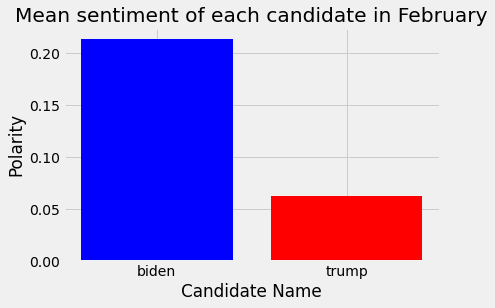

In [81]:
feb1=feb.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
feb1.drop([0],inplace=True)
plt.bar(feb1['about'], feb1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in February")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# MAR

In [82]:
data_text = mar[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('mar.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 77

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2706 unique tokens: ['13', '2018', '86-year-old', 'According', 'CCC']...) from 77 documents (total 5103 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 77 documents, updating model once every 77 documents, evaluating perplexity every 77 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.273 per-word bound, 1237.0 perplexity estimate based on a held-out corpus of 77 documents with 5103 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #77/77
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.007*"coronavirus" + 0.006*"said" + 0.005*"media

In [51]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [52]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Biden,Broncos,Republican,Senate,coronavirus
1,coronavirus,coronavirus,said,said,said
2,said,Biden,told,Trump,Democratic
3,Democratic,vote,Trump,coronavirus,President
4,voting,game,--,President,media
5,House,said,News,(CNN),Biden
6,election,economic,coronavirus,US,economic
7,President,would,CBS,House,think
8,Joe,video,officials,Pelosi,viewers
9,state,Democrats,Biden,Democratic,national


In [53]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [54]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [55]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,senate,biden,same,really
1,started,republicans,tuesday,viewers,walden
2,magsafe,stimulus,delegates,wall,treasure
3,feature,rolled,primary,cable,smart
4,12,economic,sanders,coronavirus,he
5,best,aid,super,cnn,understand
6,getting,intended,joe,news,think
7,new,critical,democratic,said,coming
8,race,deliver,race,66,re
9,baltimore,trillion,vote,message,we


Text(0.5, 0, 'Candidate Name')

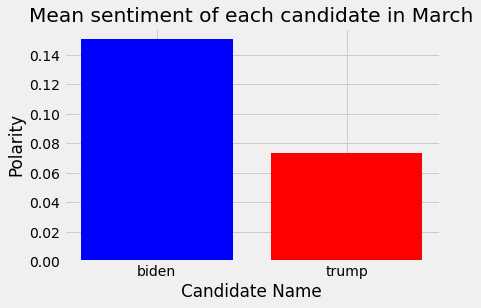

In [56]:
mar1=mar.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
mar1.drop([0],inplace=True)
plt.bar(mar1['about'], mar1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in March")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# APR

In [83]:
data_text = apr[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('apr.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 90

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3229 unique tokens: ['&', '(Dempsey)', 'Access.\n2020', 'AllWritten', 'CBS']...) from 90 documents (total 5876 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 90 documents, updating model once every 90 documents, evaluating perplexity every 90 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.517 per-word bound, 1464.9 perplexity estimate based on a held-out corpus of 90 documents with 5876 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #90/90
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.007*"Democrats" + 0.006*"Trump" + 0.005*

In [84]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [85]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Democrats,Trump,Trump,Democratic,said
1,Trump,said,CBS,said,Democratic
2,health,coronavirus,House,White,President
3,public,say,coronavirus,Trump,Trump
4,black,protests,White,coronavirus,absentee
5,driven,President,said,people,coronavirus
6,said,state,state,state,state
7,would,Democratic,campaign,campaign,told
8,protests,(CNN),Democratic,Biden,York
9,House,according,administration,states,United


In [86]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [87]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [88]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,permission,73,trump,driven,protests
1,edit,hospitalized,democrats,states,june
2,article,place,democratic,stay,society
3,city,across,campaign,health,racism
4,york,restrictions,said,home,say
5,top,covid,biden,public,overall
6,there,19,white,dakota,now
7,new,000,president,orders,poll
8,car,new,black,decisions,cnn
9,feb,cuomo,senate,governors,24


Text(0.5, 0, 'Candidate Name')

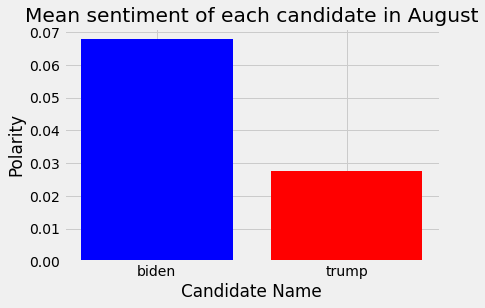

In [89]:
apr1=apr.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
apr1.drop([0],inplace=True)
plt.bar(apr1['about'], apr1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# MAY

In [90]:
data_text = may[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('may.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 81

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3003 unique tokens: ['30', 'Bright', 'Bright:', 'CBS', 'Dr.']...) from 81 documents (total 5493 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 81 documents, updating model once every 81 documents, evaluating perplexity every 81 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.431 per-word bound, 1380.4 perplexity estimate based on a held-out corpus of 81 documents with 5493 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #81/81
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.007*"Democratic" + 0.007*"said" + 0.006*"Trump" + 0.005

In [91]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [92]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Democratic,Trump,Trump,Biden,Trump
1,said,coronavirus,President,Trump,President
2,Trump,national,coronavirus,would,said
3,House,news,Democratic,said,Republican
4,President,House,new,campaign,mask
5,Democrats,White,House,coronavirus,Yoho
6,state,New,women,state,get
7,--,President,Republican,President,(CNN)
8,Republican,said,voters,House,Carolina
9,last,TV,Donald,told,wearing


In [93]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [94]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [95]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,bash,magsafe,trump,carolina,campaign
1,dana,feature,said,north,ellis
2,but,iphone,state,convention,sex
3,time,12,president,four,trump
4,unemployment,started,house,away,legalized
5,hassett,best,biden,gov,marriage
6,rate,getting,democrats,thing,pedophilia
7,double,new,republican,carried,bestiality
8,may,hampshire,national,tell,same
9,state,sanders,mask,played,2019


Text(0.5, 0, 'Candidate Name')

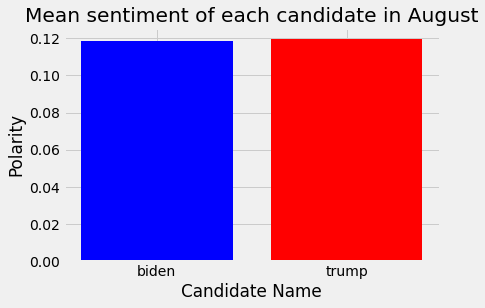

In [96]:
may1=may.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
may1.drop([0],inplace=True)
plt.bar(may1['about'], may1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# JUN

In [71]:
data_text = jun[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('jun.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 76

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2876 unique tokens: ['1,001', '1,852', '1,900', '2,273', '39']...) from 76 documents (total 4951 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 76 documents, updating model once every 76 documents, evaluating perplexity every 76 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.509 per-word bound, 1457.4 perplexity estimate based on a held-out corpus of 76 documents with 4951 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #76/76
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.007*"Trump" + 0.006*"Democratic" + 0.004*"President" +

In [72]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [73]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,Trump,Senate,Trump,House
1,Democratic,said,said,said,Democratic
2,President,Democratic,President,Biden,White
3,Senate,Senate,Trump,Republican,Biden
4,said,primary,state,Democratic,Senate
5,primary,campaign,percent,voting,said
6,women,Democrats,Democratic,presidential,told
7,state,House,--,Democrats,Trump
8,Biden,Orange,McGrath,told,primary
9,presidential,County,House,delegates,state


In [74]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [75]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [76]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,trump,delegates,cuomo,breakfast,white
1,primary,charlotte,andrew,enemies,house
2,biden,pageantry,reopen,faith,judd
3,democratic,meetings,and,allies,spokesman
4,president,24,homey,pelosi,deere
5,state,aug,matilda,know,cnn
6,said,assemble,status,going,services
7,republicans,before,deaths,arthur,manchurian
8,000,300,gives,inappropriate,brig
9,senate,speeches,undated,soon,updated


Text(0.5, 0, 'Candidate Name')

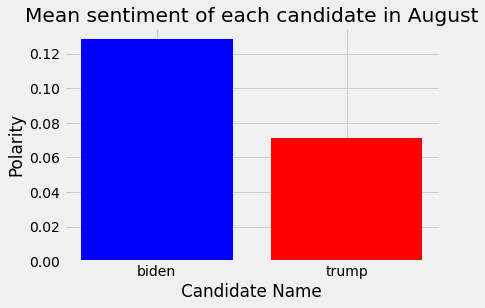

In [77]:
jun1=jun.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
jun1.drop([0],inplace=True)
plt.bar(jun1['about'], jun1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# JULY

In [78]:
data_text = jul[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('jul.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 96

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3337 unique tokens: ['"freedom', 'Americans', 'Black', 'CBS', 'Confederate']...) from 96 documents (total 6420 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 96 documents, updating model once every 96 documents, evaluating perplexity every 96 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.444 per-word bound, 1392.5 perplexity estimate based on a held-out corpus of 96 documents with 6420 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #96/96
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.022*"Trump" + 0.006*"said" + 0.005*"camp

In [79]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [80]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,President,Trump,said,Trump
1,said,Trump,President,Trump,campaign
2,campaign,coronavirus,say,Republican,Democratic
3,Republican,said,ballots,House,House
4,President,Trump's,supporters,Senate,President
5,presidential,rate,Hong,Trump's,Republican
6,would,House,told,President,two
7,Democratic,case,said,Sen.,--
8,House,US,—,election,presidential
9,White,fatality,election,week,said


In [81]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [82]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [83]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,senate,mcenany,trump,vice
1,started,executive,comments,election,pence
2,feature,democrats,trump,voting,president
3,magsafe,orders,added,mail,lacrosse
4,getting,house,think,campaign,wisconsin
5,12,white,donald,republican,mike
6,best,republicans,mainstream,ballots,speech
7,new,said,sense,tillis,didn
8,debate,meadows,equally,in,dana
9,video,people,sharpton,2020,mishandled


Text(0.5, 0, 'Candidate Name')

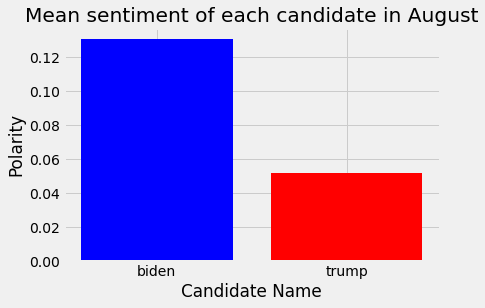

In [84]:
jul1=jul.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
jul1.drop([0],inplace=True)
plt.bar(jul1['about'], jul1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# AUG

In [85]:
data_text = aug[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('aug.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 162

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(4633 unique tokens: ['"Face', '2020,', '8,', 'Good', 'Governor']...) from 162 documents (total 10707 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 162 documents, updating model once every 162 documents, evaluating perplexity every 162 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.479 per-word bound, 1427.6 perplexity estimate based on a held-out corpus of 162 documents with 10707 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #162/162
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.010*"Trump" + 0.007*"million" + 0.006*"–" +

In [86]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [87]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,Trump,Trump,Trump,said
1,million,Democratic,Democratic,Biden,Postal
2,–,said,White,Democratic,Trump
3,A18-49:,National,--,Republican,House
4,Social,President,say,Donald,would
5,Democratic,campaign,said,President,say
6,(R)Viewers:,political,President,political,Service
7,campaign,Convention,like,Joe,Americans
8,2,would,Americans,National,voters
9,Biden,absentee,political,--,coronavirus


In [88]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [89]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [90]:

get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,trump,history,hospitalized,results
1,magsafe,biden,stelter,73,46th
2,started,convention,competition,restrictions,projects
3,best,said,never,across,resultsjoe
4,feature,democratic,fox,place,statepresidential
5,12,mail,seen,covid,become
6,getting,president,like,19,presidential
7,new,in,news,000,us
8,virtual,democrats,govern,new,biden
9,dean,campaign,majority,vaccine,cnn


Text(0.5, 0, 'Candidate Name')

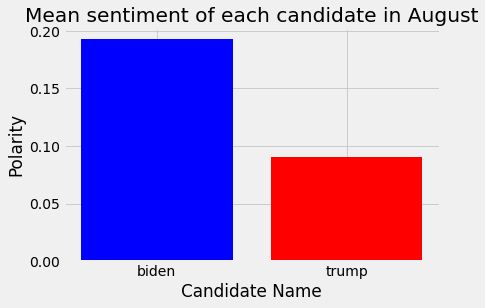

In [91]:
aug1=aug.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
aug1.drop([0],inplace=True)
plt.bar(aug1['about'], aug1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# SEP

In [92]:
data_text = sep[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('sep.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 112

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3832 unique tokens: ['"good', '"we', '30,000', '44,000.\nBourla', 'Albert']...) from 112 documents (total 7607 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 112 documents, updating model once every 112 documents, evaluating perplexity every 112 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.532 per-word bound, 1480.8 perplexity estimate based on a held-out corpus of 112 documents with 7607 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #112/112
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.008*"Supreme" + 0.007*"Court" + 0.

In [93]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [94]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Supreme,Trump,Trump,Trump,said
1,Court,Supreme,said,Democratic,Senate
2,Senate,Court,Supreme,said,Court
3,said,Biden,Democrats,President,New
4,House,Democratic,Biden,Supreme,Supreme
5,Trump,said,political,would,Trump
6,told,President,—,Democrats,political
7,political,Democrats,would,Court,York
8,Republicans,would,Democratic,Biden,presidential
9,people,election,President,—,Republican


In [95]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [96]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [97]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,greenspan,court,mail,margins,ads
1,never,supreme,absentee,senate,political
2,anything,trump,voting,presidential,facebook
3,crisis,justice,in,90,let
4,seen,president,postal,differences,users
5,ve,election,service,biden,see
6,covid,republicans,guilfoyle,lineup,people
7,like,nominee,universal,races,social
8,vaccine,said,officials,incorporate,issue
9,polls,senate,vote,leading,outright


Text(0.5, 0, 'Candidate Name')

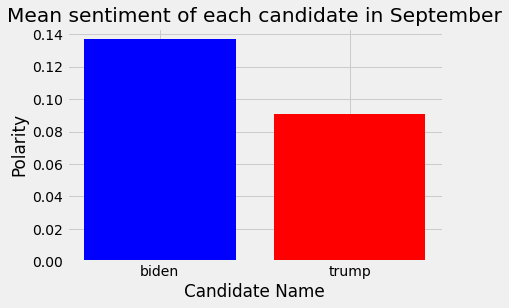

In [98]:
sep1=sep.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
sep1.drop([0],inplace=True)
plt.bar(sep1['about'], sep1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in September")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# OCT

In [99]:
data_text = oct[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('oct.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 281

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(7163 unique tokens: ['"60', "''60", '40', '60', 'AIRTIME!\nLesley']...) from 281 documents (total 18295 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 281 documents, updating model once every 281 documents, evaluating perplexity every 281 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.781 per-word bound, 1760.1 perplexity estimate based on a held-out corpus of 281 documents with 18295 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #281/281
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.012*"Trump" + 0.005*"said" + 0.005*"Bide

In [100]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [101]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,Trump,Trump,said,Trump
1,said,House,Biden,Trump,said
2,Biden,President,President,election,Senate
3,Democrats,said,said,Biden,President
4,House,Biden,Joe,Democrats,Biden
5,campaign,White,voting,Republican,Democrats
6,President,told,debate,would,House
7,states,Republican,--,political,campaign
8,Republicans,campaign,Donald,Supreme,Republican
9,--,--,first,presidential,Republicans


In [102]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [103]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [104]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,nan,degrees,iphone,hospitalized,trump
1,zuckerberg,transport,magsafe,restrictions,biden
2,exceed,pfizer,12,73,president
3,exactly,94,feature,000,election
4,exaggerated,vaccine,best,place,cnn
5,exaggerating,keep,started,across,said
6,examination,bright,getting,19,house
7,examined,thanksgiving,new,covid,campaign
8,example,fda,hampshire,new,joe
9,exceedingly,guidelines,arizona,positive,democrats


Text(0.5, 0, 'Candidate Name')

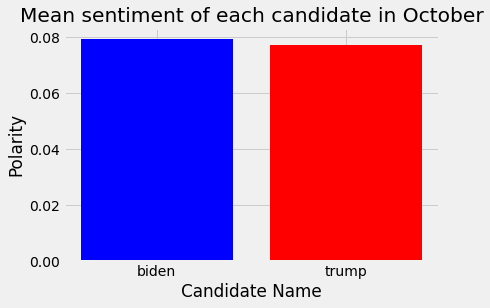

In [105]:
oct1=oct.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
oct1.drop([0],inplace=True)
plt.bar(oct1['about'], oct1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in October")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# NOV

In [106]:
data_text = nov[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('nov.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 91

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3239 unique tokens: ['"I\'ve', 'Almost', 'Barack', 'D.C.', 'House']...) from 91 documents (total 6259 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 91 documents, updating model once every 91 documents, evaluating perplexity every 91 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-10.411 per-word bound, 1362.0 perplexity estimate based on a held-out corpus of 91 documents with 6259 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #91/91
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.013*"Trump" + 0.009*"Biden" + 0.005*"—" + 0.004*"

In [107]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [108]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,Trump,Biden,Biden,Biden
1,Biden,Biden,Trump,campaign,Trump
2,—,said,election,Trump,House
3,President,President,—,Joe,White
4,Joe,Senate,Republican,—,President
5,said,Georgia,percent,House,campaign
6,Donald,election,said,Republican,election
7,House,Joe,campaign,Democratic,vote
8,Republican,would,House,President,said
9,transition,Donald,President,said,Democratic


In [109]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [110]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [111]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,biden,kaitlan,votes,grant
1,getting,trump,ask,percent,that
2,magsafe,president,jiang,electoral,nih
3,feature,campaign,press,biden,wuhan
4,started,said,weijia,49,lab
5,best,house,answer,trump,work
6,12,transition,reporter,college,year
7,new,election,question,georgia,true
8,journalists,the,china,currently,scott
9,data,white,questions,vote,lightly


Text(0.5, 0, 'Candidate Name')

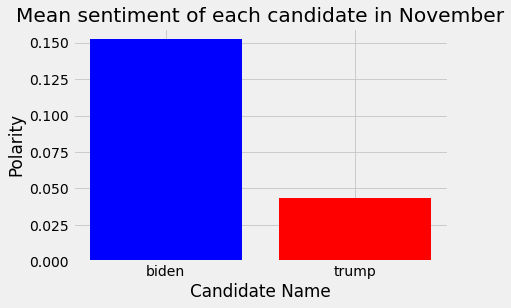

In [112]:
nov1=nov.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
nov1.drop([0],inplace=True)
plt.bar(nov1['about'], nov1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in November")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

overal topic modelling

In [119]:
data_text = df[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('total.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 1000 / 1329

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(22344 unique tokens: ['"60', "''60", '40', '60', 'AIRTIME!\nLesley']...) from 1329 documents (total 88346 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 1329 documents, updating model once every 1329 documents, evaluating perplexity every 1329 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-11.444 per-word bound, 2785.3 perplexity estimate based on a held-out corpus of 1329 documents with 88346 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #1329/1329
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.010*"said" + 0.009*"Trump" + 0.0

In [120]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict)

In [121]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,said,Trump,Trump,Trump,Trump
1,Trump,President,said,said,President
2,Democratic,House,Democratic,Biden,said
3,Biden,campaign,Biden,Democrats,House
4,President,Democrats,election,Democratic,White
5,Republican,Biden,CNN,election,Democratic
6,House,said,--,Republican,Senate
7,Democrats,would,Republican,state,would
8,Republicans,political,would,--,coronavirus
9,—,Democratic,House,voting,told


In [122]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [123]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [124]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,trump,pfizer,permission,73
1,magsafe,biden,94,article,hospitalized
2,feature,president,transport,app,restrictions
3,started,said,degrees,campaign,covid
4,12,election,vaccine,fauci,across
5,best,cnn,keep,trump,place
6,getting,campaign,bourla,wear,000
7,new,democratic,coronavirus,don,19
8,york,the,pharmaceutical,gunter,new
9,hampshire,democrats,pledge,surveillance,crisis


Text(0.5, 0, 'Candidate Name')

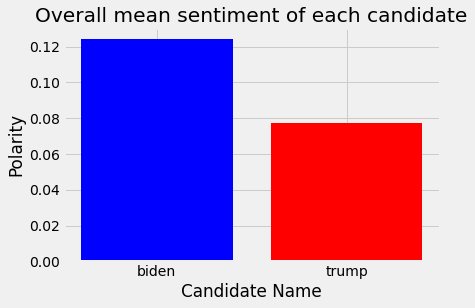

In [125]:
overall=df.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
overall.drop([0],inplace=True)
plt.bar(overall['about'], overall['Polarity'], color=['blue', 'red'])
plt.title("Overall mean sentiment of each candidate")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

In [98]:
absolutes = df.groupby('Media')['biden','trump','democrats','republicans'].sum().astype(int)
display(absolutes)

C:\Users\SUMANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,biden,trump,democrats,republicans
Media,,,,
CBS News,57,72,1,8
CNN News,44,140,5,80
Fox News,24,73,8,1
NBC News,43,60,2,4


In [99]:
totals = df.groupby('Media').size()
relatives = 100 * absolutes.divide(totals, axis=0)
display(relatives)

,biden,trump,democrats,republicans
Media,,,,
CBS News,15.039578,18.997361,0.263852,2.110818
CNN News,7.719298,24.561404,0.877193,14.035088
Fox News,12.631579,38.421053,4.210526,0.526316
NBC News,22.631579,31.578947,1.052632,2.105263


In [100]:
channel_stats = pd.DataFrame({
    'relevant': df.groupby('Media').relevant.sum().astype(int),
    'total': df.groupby('Media').size()
})
channel_stats['percentage_relevant'] = (100*channel_stats.relevant/channel_stats.total).round(2)
channel_stats.sort_values('percentage_relevant', ascending=False)

,relevant,total,percentage_relevant
Media,,,
Fox News,98,190,51.58
NBC News,88,190,46.32
CNN News,235,570,41.23
CBS News,117,379,30.87


# Visualizations

In [112]:
import matplotlib.pyplot as plt
import math
def plot_channel_stats(stats, topics, channels, fig_height=8, y_center=False, title=None):
    """
    Plots bar charts for the given channel stats.
    A separate subplot is generated for each given topic.
    """
    fig, axes = plt.subplots(nrows=int(math.ceil(topics.shape[0]/2)), ncols=2, figsize=(8,fig_height))
    fig.subplots_adjust(hspace=.5)
    
    for i, topic in topics.iterrows():
        ax = fig.axes[i]
        
        # If requested, center all axes around 0
        if y_center:
            # Calculate the approximate amplitude of the given stats values
            amplitude = math.ceil(stats.abs().values.max()*10)/10
            ax.set_ylim(-amplitude, amplitude)
        
        # If we have negative values, grey out the negative space for better contrast
        if stats.values.min() < 0:
            ax.axhspan(0, ax.get_ylim()[0], facecolor='0.2', alpha=0.15)
        
        color = channels.sort_values('title').color
        ax.bar(range(len(stats.index)), stats[topic.slug], tick_label=stats.index, color=color, align='center')
        ax.set_title(topic.title, size=11)
        
    # Hide potential last empty subplot
    if topics.shape[0] % 2:
        fig.axes[-1].axis('off')

    # Optional title at the top
    if title is not None:
        multiline = '\n' in title
        y = 1. if multiline else .96
        plt.suptitle(title, size=14, y=y)
        
    plt.show()

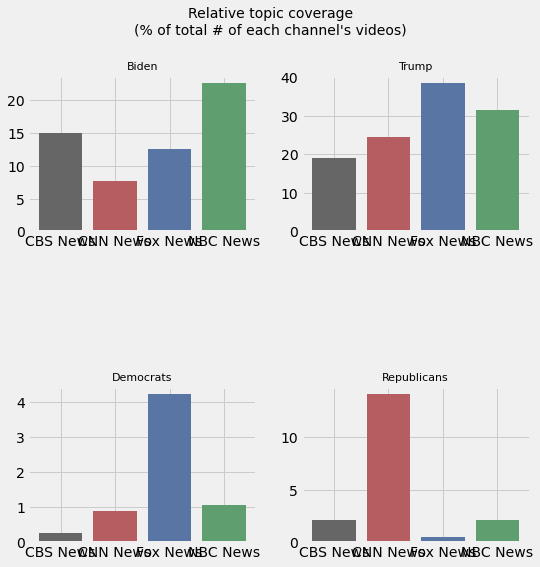

In [114]:
plot_channel_stats(relatives,topics,channels, title='Relative topic coverage\n(% of total # of each channel\'s videos)')

In [115]:
articles= df[['Media','Title','Polarity','article_id']]
articles.head()

,Media,Title,Polarity,article_id
0,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",0.197222,0
1,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,0.115000,1
2,CBS News,Trump abruptly ends '60 Minutes' interview bef...,-0.091319,2
3,CBS News,"Barack Obama speaks out on politics, the presi...",-0.022222,3
4,CBS News,CBS's New Star Trek Series Mirrors American Po...,-0.010714,4


In [103]:
#Some articles with negative sentiment
df.sort_values('Polarity')[['Media', 'Title','Polarity']].head()

,Media,Title,Polarity
543,CNN News,SE Cupp: Making fun of seniors seems like bad ...,-0.500000
1200,CBS News,House Democrats unveil police reform bill amid...,-0.433333
685,NBC News,7 Wisconsin coronavirus infections linked to E...,-0.333333
323,Fox News,California election officials tell voters not ...,-0.323333
707,NBC News,Colorado sues Postal Service over 'misinformat...,-0.320000


In [104]:
#Some articles with positive sentiment
df.sort_values('Polarity', ascending=False)[['Media', 'Title','Polarity']].head()

,Media,Title,Polarity
1144,CBS News,Democrats try to stop Sanders' momentum in fie...,0.568182
1173,CBS News,Harris accepts VP nomination after Obama deliv...,0.568182
1223,CBS News,Pence and Harris clash over virus at vice pres...,0.568182
1142,CBS News,House Democrats grill postmaster general over ...,0.568182
1227,CBS News,Impeachment trial: Democrats lay out timeline ...,0.568182


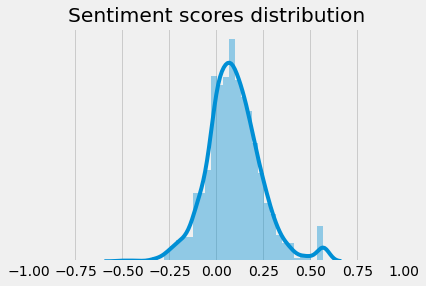

In [122]:
import seaborn as sns
sns.distplot(df.Polarity, axlabel=False, ax=plt.gca())
plt.title('Sentiment scores distribution')
plt.gca().get_yaxis().set_visible(False)
plt.xlim(-1,1)
plt.show()

Topic,biden,trump,democrats,republicans
Media,,,,
CBS News,0.147562,0.133769,0.15,0.137265
CNN News,0.111417,0.0828394,0.189636,0.0899028
Fox News,0.057893,0.0377862,0.0337269,0.0232955
NBC News,0.143478,0.0842039,0.105357,0.156315


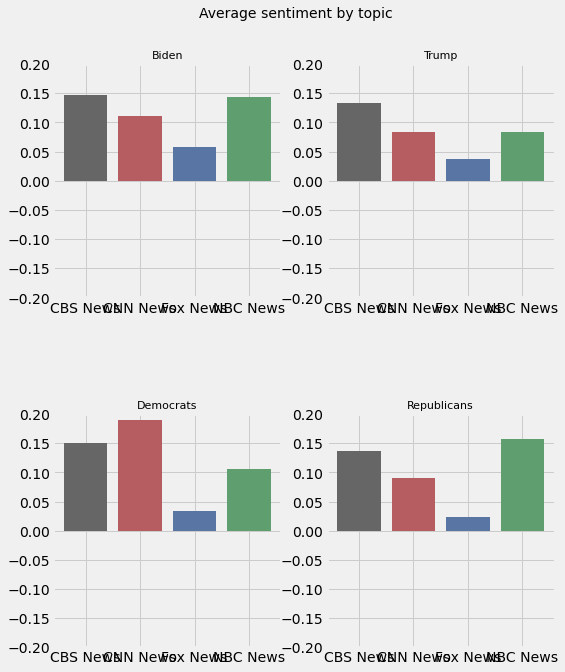

In [105]:
scores = pd.DataFrame(index=channels.sort_values('title').title, columns=topics.slug, )
for channel, group in df.groupby('Media'):
    for topic in topics.slug:
        scores.loc[channel, topic] = group[group[topic]].Polarity.mean()
scores = scores.rename_axis('Topic', axis=1)
scores = scores.rename_axis('Media', axis=0)
display(scores)
plot_channel_stats(scores, topics, channels, fig_height=10, y_center=True, title='Average sentiment by topic')

In [106]:
def plot_compressed_channel_stats(stats, color=None, y_center=False, title=None):
    """
    Similar to plot_channel_stats except everything is represented
    in a single plot (i.e. no subplots).
    """
    plt.figure(figsize=(6,4))
    ax = plt.gca()
    
    # If requested, center all axes around 0
    if y_center:
        # Calculate the approximate amplitude of the given stats values
        amplitude = math.ceil(stats.abs().values.max()*10)/10
        ax.set_ylim(-amplitude, amplitude)

    # If we have negative values, grey out the negative space
    # for better contrast
    if stats.values.min() < 0:
        ax.axhspan(0, ax.get_ylim()[0], facecolor='0.2', alpha=0.15)
        
    # The actual plot
    stats.plot(kind='bar', color=color, width=0.6, ax=ax)
    
    # Presentation cleanup
    plt.xlabel('')
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Optional title at the top
    if title is not None:
        plt.title(title)

    plt.show()

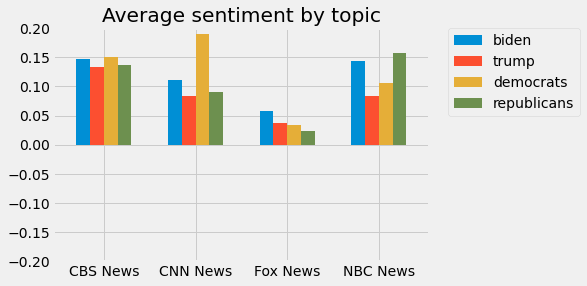

In [107]:
plot_compressed_channel_stats(scores, y_center=True, title='Average sentiment by topic')

In [108]:
from __future__ import division
import math
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
def plot_sentiment_series(videos, topics, channels, start_date=None, title=None):
    """
    Plot linear timeseries of sentiment scores for the given videos:
    One separate subplot is generated for each topic. Each subplot
    has one timeseries for each channel, and one timeseries for the
    average values across all channells.
    """
    fig, axes = plt.subplots(nrows=topics.shape[0], ncols=1, figsize=(8,4*topics.shape[0]))
    fig.subplots_adjust(hspace=.3)
    
    # Resample rule: 2-week buckets
    resample_rule = '2W'
    
    # Calculate the approximate amplitude of the given sentiment values
    amplitude = math.ceil(videos.Polarity.abs().max()*10)/10
    
    for i, topic in topics.reset_index().iterrows():
        ax = fig.axes[i]
        # Grey out the negative sentiment area
        ax.axhspan(0, -1, facecolor='0.2', alpha=0.15)

        # Plot a timeseries for the average sentiment across all channels
        topic_mask = videos[topic.slug]
        if start_date is not None:
            topic_mask = topic_mask & (videos.Date >= start_date)
        ts = videos[topic_mask].set_index('Date').resample(resample_rule)['Polarity'].mean().interpolate()
        sns.tsplot(ts, ts.index, color='#fcef99', linewidth=6, ax=ax)
        
        # Plot a separate time-series for each channel
        for _, channel in channels.iterrows():
            channel_mask = topic_mask & (videos.Media==channel.title)
            ts = videos[channel_mask].set_index('Date').resample(resample_rule)['Polarity'].mean().interpolate()
            if len(ts) > 1:
                sns.tsplot(ts, ts.index, color=channel['color'], linewidth=1, ax=ax)

        # Format x-axis labels as dates
        xvalues = ax.xaxis.get_majorticklocs()
        xlabels = [datetime.utcfromtimestamp(x/1e9).strftime("%Y.%m") for x in xvalues]
        ax.set_xticklabels(xlabels)

        # A little extra presentation cleanup
        ax.set_xlabel('')
        ax.set_title(topic['title'], size=11)
        ax.set_ylim(-amplitude,amplitude)

        # Add legend
        handles = [Patch(color='#fcef99', label='Average')]
        for _, channel in channels.iterrows():
            handles.append(Patch(color=channel['color'], label=channel['title']))
        ax.legend(handles=handles, fontsize=8)

    # Optional title at the top
    if title is not None:
        plt.suptitle(title, size=14, y=.92)
        
    plt.show()

C:\Users\SUMANA\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\SUMANA\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\SUMANA\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\SUMANA\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.war

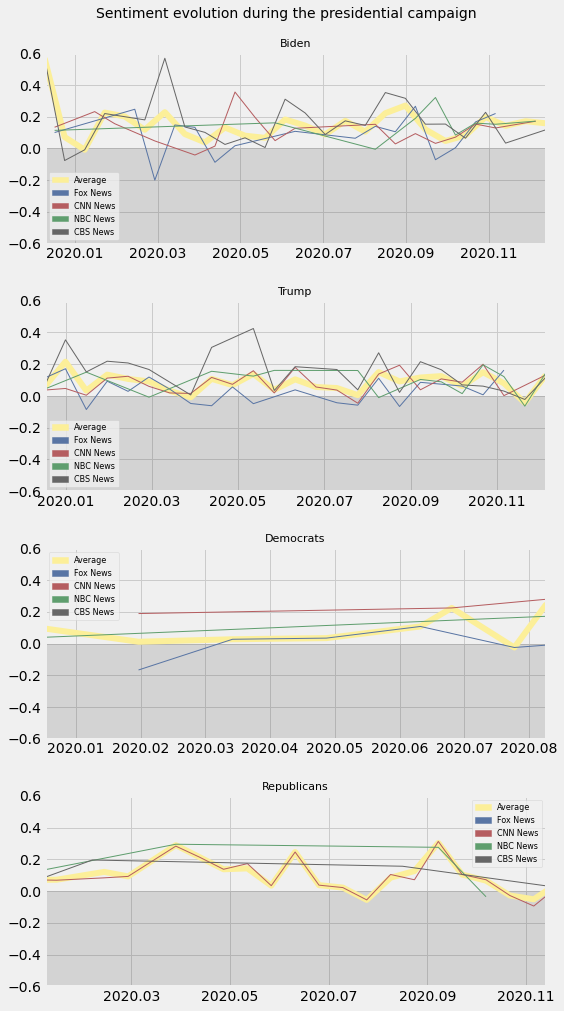

In [109]:
plot_sentiment_series(df, topics, channels, start_date=datetime(2020, 1, 1), title='Sentiment evolution during the presidential campaign')

CITATIONS
Referred class notes and notebooks
https://towardsdatascience.com/sentiment-analysis-on-the-tweets-about-distance-learning-with-textblob-cc73702b48bc
https://towardsdatascience.com/sentiment-analysis-on-twitter-data-regarding-2020-us-elections-1de4bedbe866
https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082
https://towardsdatascience.com/topic-modeling-articles-with-nmf-8c6b2a227a45
https://medium.com/ml2vec/topic-modeling-is-an-unsupervised-learning-approach-to-clustering-documents-to-discover-topics-fdfbf30e27df
https://medium.com/@vivekvscool/natural-language-processing-topic-modelling-including-latent-dirichlet-allocation-lda-860e5a3d377f